<!--BOOK_INFORMATION-->
<a href="https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-opencv" target="_blank"><img align="left" src="data/cover.jpg" style="width: 76px; height: 100px; background: white; padding: 1px; border: 1px solid black; margin-right:10px;"></a>
*This notebook contains an excerpt from the upcoming book [Machine Learning for OpenCV](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-opencv) by Michael Beyeler (expected Aug 2017).
The code is released under the [MIT license](https://opensource.org/licenses/MIT),
and is available on [GitHub](https://github.com/mbeyeler/opencv-machine-learning).*

*Note that this excerpt contains only the raw code - the book is rich with additional explanations and illustrations.
If you find this content useful, please consider supporting the work by
[buying the book](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-opencv)!*

<!--NAVIGATION-->
< [None](09.00-Using-Deep-Learning-to-Classify-Handwritten-Digits.ipynb) | [Contents](../README.md) | [None](11.00-Selecting-the-Right-Model-with-Hyper-Parameter-Tuning.ipynb) >

# Random forests

In [1]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=100)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

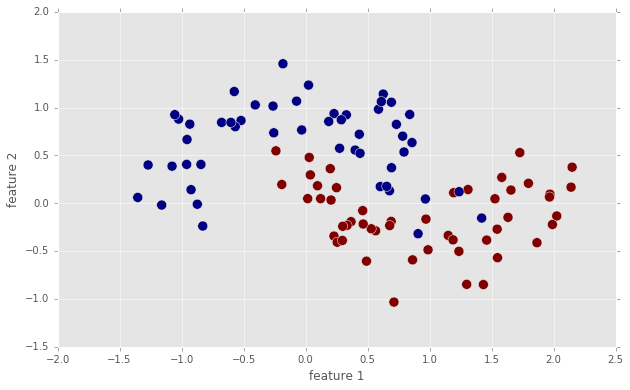

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=100, c=y)
plt.xlabel('feature 1')
plt.ylabel('feature 2');
plt.savefig('moons.png')

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=100
)

In [5]:
import numpy as np
def plot_decision_boundary(classifier, X_test, y_test):
    # create a mesh to plot in
    h = 0.02  # step size in mesh
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    X_hypo = np.c_[xx.ravel().astype(np.float32),
                   yy.ravel().astype(np.float32)]
    zz = classifier.predict(X_hypo)
    zz = zz.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200)

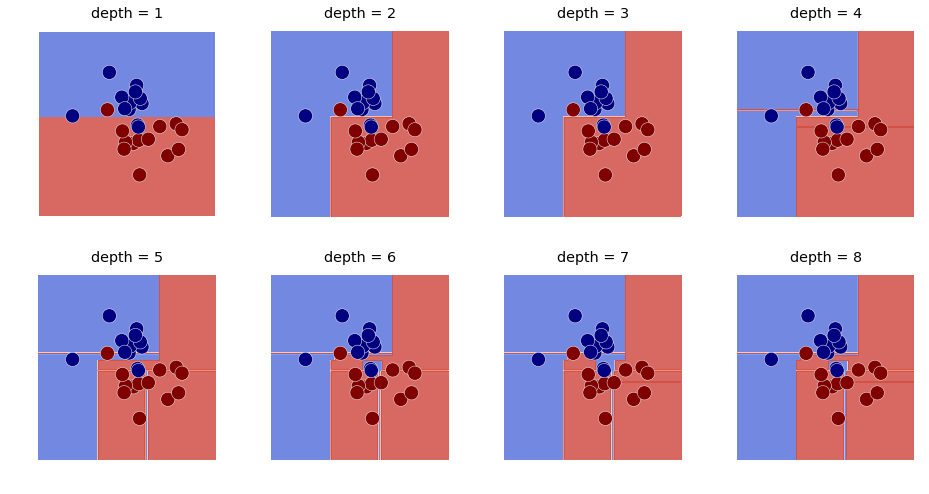

In [6]:
from sklearn.tree import DecisionTreeClassifier
plt.figure(figsize=(16, 8))
for depth in range(1, 9):
    plt.subplot(2, 4, depth)
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(X, y)
    plot_decision_boundary(tree, X_test, y_test)
    plt.axis('off')
    plt.title('depth = %d' % depth)
    
plt.savefig('trees.png')

In [7]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5, random_state=200)

In [8]:
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.88

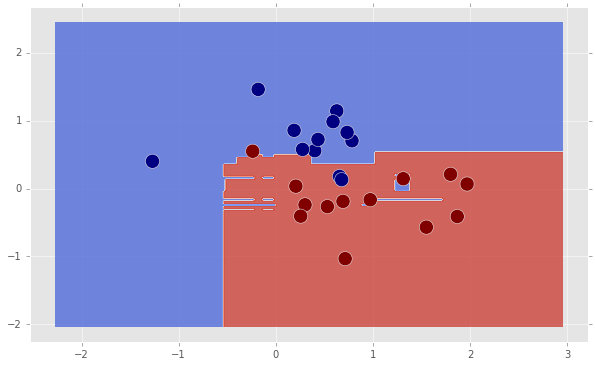

In [9]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(forest, X_test, y_test)
plt.savefig('forest.png')

## Implementing extremely randomized trees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree = ExtraTreesClassifier(n_estimators=10, random_state=100)

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=100
)

In [13]:
extra_tree.fit(X_train, y_train)
extra_tree.score(X_test, y_test)

0.92105263157894735

In [14]:
forest = RandomForestClassifier(n_estimators=10, random_state=100)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.92105263157894735

In [15]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.92105263157894735

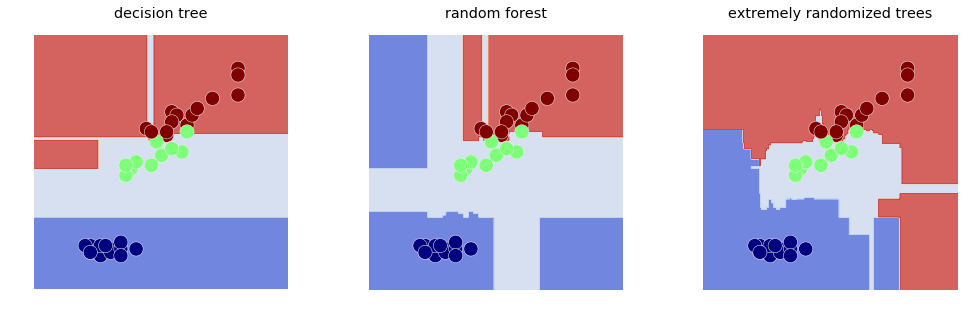

In [25]:
classifiers = [
    (1, 'decision tree', tree),
    (2, 'random forest', forest),
    (3, 'extremely randomized trees', extra_tree)
]

plt.figure(figsize=(17, 5))
for sp, name, model in classifiers:
    plt.subplot(1, 3, sp)
    plot_decision_boundary(model, X_test, y_test)
    plt.title(name)
    plt.axis('off')
    
plt.savefig('extra_tree.png')

## Using random forests for regression

<!--NAVIGATION-->
< [None](09.00-Using-Deep-Learning-to-Classify-Handwritten-Digits.ipynb) | [Contents](../README.md) | [None](11.00-Selecting-the-Right-Model-with-Hyper-Parameter-Tuning.ipynb) >